In [4]:
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)



module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [12]:
def embed(input):
    return model(input)

def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_,message_embeddings_ ):
    plot_similarity(messages_, message_embeddings_, 90)

In [20]:
document_0 = 'Economic news have little effect on financial markets'
document_1 = 'eat with wooden spoon'
document_2 = 'eat with metallic spoon'

messages = [document_0, document_1, document_2]

message_embeddings = embed(messages)

print("Embedding size: {}".format(len(message_embedding)))

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    print("Message: {}".format(messages[i]))
    message_embedding_snippet = ", ".join((str(x) for x in message_embedding[:3]))
    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Embedding size: 512
Message: Economic news have little effect on financial markets
Embedding: [0.029726974666118622, 0.004525386728346348, 0.003189939772710204, ...]

Message: eat with wooden spoon
Embedding: [0.005436183884739876, 0.05711539462208748, 0.052789684385061264, ...]

Message: eat with metallic spoon
Embedding: [0.030168740078806877, 0.0445793978869915, 0.06876149773597717, ...]



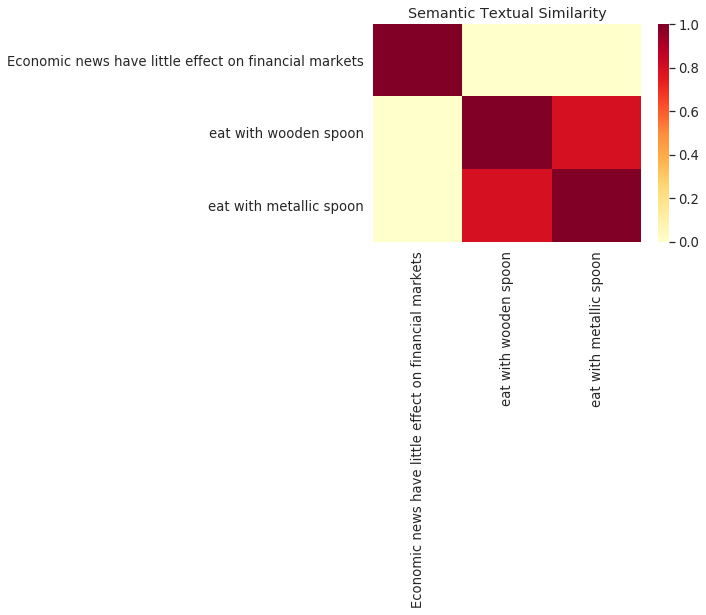

In [21]:
run_and_plot(messages,message_embeddings)